In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from analyser import Analyser

# Load & Transform

In [5]:
liar_analyser = Analyser()

In [6]:
liar_analyser.prep_liar_data('liar_dataset/train.tsv','liar_dataset/valid.tsv','liar_dataset/test.tsv')

2025-03-18 17:16:11,751 - analyser - INFO - Training data shape: (11524, 2)
2025-03-18 17:16:11,752 - analyser - INFO - Test data shape: (1267, 2)
2025-03-18 17:16:11,758 - analyser - INFO - Label distribution in training: label
1    0.557098
0    0.442902
Name: proportion, dtype: float64


(                                               statement  label
 0      says the annies list political group supports ...      0
 1      when did the decline of coal start it started ...      1
 2      hillary clinton agrees with john mccain by vot...      1
 3      health care reform legislation is likely to ma...      0
 4      the economic turnaround started at the end of ...      1
 ...                                                  ...    ...
 11519  for the first time in more than a decade impor...      1
 11520  says donald trump has bankrupted his companies...      1
 11521  john mccain and george bush have absolutely no...      1
 11522  a new poll shows 62 percent support the presid...      0
 11523  no one claims the report vindicating new jerse...      0
 
 [11524 rows x 2 columns],
                                               statement  label
 0     building a wall on the u s mexico border will ...      1
 1     wisconsin is on pace to double the number of l...      0

In [7]:
train, test = liar_analyser.train,liar_analyser.test

# Lemmatisation

In [8]:
lemmatiser = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [9]:
def lemmatise(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatiser.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

In [10]:
train['statement'] = train['statement'].apply(lemmatise)
test['statement'] = test['statement'].apply(lemmatise)

# Train Test split

In [13]:
X_train = train['statement']
y_train = train['label']
X_test = test['statement']
y_test = test['label']

# Tokenisation

In [14]:
max_words = 5000  
max_len = 100  
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_seq = tokenizer.texts_to_sequences(X_train)
X_pad = pad_sequences(X_seq, maxlen=max_len)

In [18]:
print(X_seq[0])

[1, 835, 417, 330, 71, 224, 4745, 128, 1499]


In [19]:
print(X_train[0])

say annies list political group support third trimester abortion demand


# Crossvalidation

In [15]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
results = []

In [22]:
for train_idx, val_idx in cv.split(X_pad, y_train):
    pass

# Fit and Predict

In [26]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('logreg', LogisticRegression())])

In [27]:
y_pred = pipeline.predict(X_test)

# Evaluate

Model Accuracy: 0.6259

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       553
           1       0.64      0.75      0.69       714

    accuracy                           0.63      1267
   macro avg       0.62      0.61      0.61      1267
weighted avg       0.62      0.63      0.62      1267



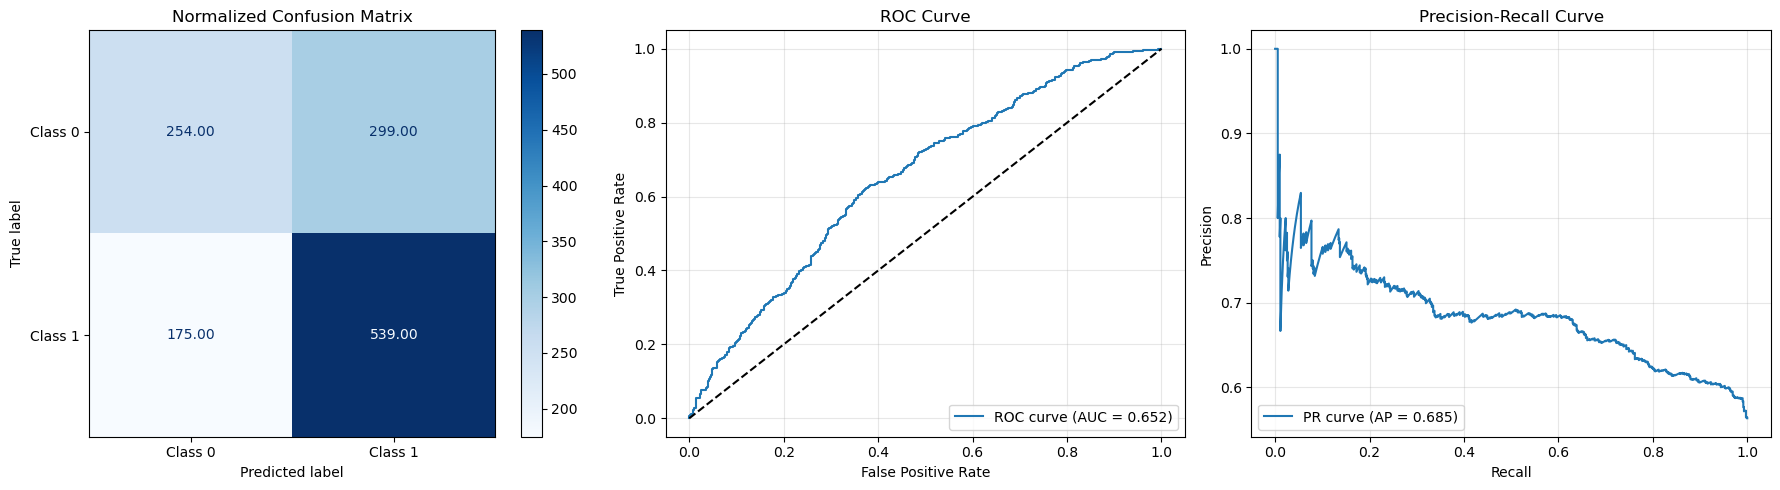

In [28]:
metrics = liar_analyser.evaluate_model(y_pred, y_test, X_test, pipeline)